# NLP with Python for Machine Learning

Natural language processing (NLP) is a machine learning technology that gives computers the ability to interpret, manipulate, and comprehend human language. Organizations today have large volumes of voice and text data from various communication channels like emails, text messages, social media newsfeeds, video, audio, and more. They use NLP software to automatically process this data, analyze the intent or sentiment in the message, and respond in real time to human communication.

Natural language processing (NLP) is critical to fully and efficiently analyze text and speech data. It can work through the differences in dialects, slang, and grammatical irregularities typical in day-to-day conversations.

Companies use it for several automated tasks, such as to:
- Process, analyze, and archive large documents
- Analyze customer feedback or call center recordings
- Run chatbots for automated customer service
- Answer who-what-when-where questions
- Classify and extract text

<img src= "https://datasciencedojo.com/wp-content/uploads/MicrosoftTeams-image-34-1.jpg" width=450 height=250/>

In [136]:
#importing the natural language toolkit
import nltk

In [137]:
from nltk.corpus import stopwords
stopwords=stopwords.words('english')

#### Desciption of the data

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,568 messages, tagged acording being ham (legitimate) or spam.
<br> The files contain one message per line. Each line is composed by two columns: label (ham or spam) and the raw text.

In [138]:
#Reading the tsv file
rawdata=open("C:/Users/Prath/OneDrive/Desktop/SMSSpamCollection.tsv").read()
rawdata[0:500]

"ham\tI've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.\nspam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\nham\tNah I don't think he goes to usf, he lives around here though\nham\tEven my brother is not like to speak with me. They treat me like aid"

In [139]:
# Converting tab separated values to new line
parsedData=rawdata.replace("\t","\n").split("\n")
parsedData[0:5]

['ham',
 "I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.",
 'spam',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham']

In [140]:
# Separating label and text data
labelList=parsedData[0::2]
textList=parsedData[1::2]

In [141]:
len(textList)

5570

In [142]:
print(labelList[0:5])
print(textList[0:5])

['ham', 'spam', 'ham', 'ham', 'ham']
["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.", "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", "Nah I don't think he goes to usf, he lives around here though", 'Even my brother is not like to speak with me. They treat me like aids patent.', 'I HAVE A DATE ON SUNDAY WITH WILL!!']


In [143]:
#Converting into dataFrame
import pandas as pd
fullCorpus = pd.DataFrame(
            { "label":labelList[:-1], "body_list":textList})
fullCorpus.head()

,label,body_list
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. Yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 0845281007...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [144]:
# Do the same with csv
fullCorpus=pd.read_csv("C:/Users/Prath/OneDrive/Desktop/SMSSpamCollection.tsv", sep='\t',header=None)
fullCorpus.columns=['label','body_list']

# For setting col width in DataFrame Head
pd.set_option('display.max_colwidth',150)

fullCorpus.head()

,label,body_list
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. Yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 0845281007...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


### Text Preprocessing

The first thing you need to do in any NLP project is text preprocessing. Preprocessing input text simply means putting the data into a predictable and analyzable form. It’s a crucial step for building an amazing NLP application.
- Removing Punctuations
- Tokenization
- Stopword Removal
- Stemming 

In [145]:
fullCorpus.shape

(5568, 2)

In [146]:
# How many spam/ham are there
print("Out of {} rows, {} are spam, {} are ham".format(len(fullCorpus),
                                                       len(fullCorpus[fullCorpus["label"]=='spam']),
                                                      (len(fullCorpus[fullCorpus["label"]=='ham']))))

Out of 5568 rows, 746 are spam, 4822 are ham


In [147]:
fullCorpus.isnull().sum()

label        0
body_list    0
dtype: int64

### Removing Punctuations

The punctuation removal process will help to treat each text equally. 
We need to take care of the text while removing the punctuation because the contraction words will not have any meaning after the punctuation removal process. Such as ‘don’t’ will convert to ‘dont’ or ‘don t’ depending upon what you set in the parameter.

In [148]:
import string
def nopunct (text):
    text_nopunct="".join([char for char in text if char not in string.punctuation])
    return text_nopunct

fullCorpus["Clean_body"] = fullCorpus["body_list"].apply(lambda x: nopunct(x))
data=fullCorpus

In [149]:
data.head()

,label,body_list,Clean_body
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. Yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your help for granted and will fulfil my promise You h...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 0845281007...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL


### Tokenization

Tokenization is the first step in any NLP pipeline. It has an important effect on the rest of your pipeline. A tokenizer breaks unstructured data and natural language text into chunks of information that can be considered as discrete elements. The token occurrences in a document can be used directly as a vector representing that document. 

This immediately turns an unstructured string (text document) into a numerical data structure suitable for machine learning. They can also be used directly by a computer to trigger useful actions and responses. Or they might be used in a machine learning pipeline as features that trigger more complex decisions or behavior.

In [150]:
import re
def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

data["clean_body_tokenized"]= data['Clean_body'].apply(lambda x: tokenize(x.lower()))
data.head()

,label,body_list,Clean_body,clean_body_tokenized
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. Yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your help for granted and will fulfil my promise You h...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, i, wont, take, your, help, for, granted, and, will..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 0845281007...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to, 87121, to, receive, entry, questionstd, txt, rat..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]"


### Stopwords removal

Stopwords are the most common words in any natural language. For the purpose of analyzing text data and building NLP models, these stopwords might not add much value to the meaning of the document.

Removing stopwords is not a hard and fast rule in NLP. It depends upon the task that we are working on. For tasks like text classification, where the text is to be classified into different categories, stopwords are removed or excluded from the given text so that more focus can be given to those words which define the meaning of the text.

In [151]:
import nltk

stopword = nltk.corpus.stopwords.words('english')

def stopword_removal (tokens):
    nostop_token=[tok for tok in tokens if tok not in stopword]
    return nostop_token

data["nostop_token"] = data["clean_body_tokenized"].apply(lambda x: stopword_removal(x))
data.head()

,label,body_list,Clean_body,clean_body_tokenized,nostop_token
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. Yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your help for granted and will fulfil my promise You h...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, i, wont, take, your, help, for, granted, and, will...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, promise, wonderful, blessing, times]"
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 0845281007...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to, 87121, to, receive, entry, questionstd, txt, rat...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 084528..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]"


### Stemming

Stemming is a text preprocessing technique used in natural language processing (NLP) to reduce words to their root or base form. The goal of stemming is to simplify and standardize words, which helps improve the performance of information retrieval, text classification, and other NLP tasks.

In [152]:
ps=nltk.PorterStemmer()

In [153]:
def clean_text(text):
    text="".join([word.lower() for word in text if word in text if word not in string.punctuation])
    tokens = re.split('\W+',text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

## Vectorization

Word Embeddings or Word vectorization is a methodology in NLP to map words or phrases from vocabulary to a corresponding vector of real numbers which used to find word predictions, word similarities/semantics. The process of converting words into numbers are called Vectorization.

#### Count Vectorization 

1. It is one of the simplest ways of doing text vectorization.

2. It creates a document term matrix, which is a set of dummy variables that indicates if a particular word appears in the document.

3. Count vectorizer will fit and learn the word vocabulary and try to create a document term matrix in which the individual cells denote the frequency of that word in a particular document, which is also known as term frequency, and the columns are dedicated to each word in the corpus.

In [214]:
# Converting words into features

from sklearn.feature_extraction.text import CountVectorizer
count_vect=CountVectorizer(analyzer=clean_text)
X_counts=count_vect.fit_transform(data['body_list'])
X_tfidf_feat=pd.concat([data['body_len'],data['punct%'],pd.DataFrame(X_tfidf.toarray())],axis=1)
print(X_counts.shape)

(5568, 8107)


In [163]:
data_sample=data[0:20]
count_vect_sample= CountVectorizer(analyzer=clean_text)
X_counts_sample = count_vect_sample.fit_transform(data_sample['body_list'])
X_counts_feat=pd.concat([data['body_len'],data['punct%'],pd.DataFrame(X_counts.toarray())],axis=1)
print(X_counts_sample.shape)
print(count_vect_sample.get_feature_names())

(20, 201)
['08002986030', '08452810075over18', '09061701461', '1', '100', '100000', '11', '12', '150pday', '16', '2', '20000', '2005', '21st', '3', '4', '4403ldnw1a7rw18', '4txtú120', '6day', '81010', '87077', '87121', '87575', '9', '900', 'aft', 'aid', 'alreadi', 'anymor', 'appli', 'ard', 'around', 'b', 'bless', 'breather', 'brother', 'call', 'caller', 'callertun', 'camera', 'cash', 'chanc', 'claim', 'click', 'co', 'code', 'colour', 'comin', 'comp', 'copi', 'cost', 'credit', 'cri', 'csh11', 'cup', 'custom', 'da', 'date', 'dont', 'eg', 'eh', 'england', 'enough', 'entitl', 'entri', 'even', 'fa', 'feel', 'final', 'fine', 'finish', 'first', 'free', 'friend', 'fulfil', 'go', 'goalsteam', 'goe', 'gonna', 'gota', 'grant', 'ha', 'help', 'hl', 'home', 'hour', 'httpwap', 'im', 'info', 'ive', 'jackpot', 'joke', 'k', 'kim', 'kl341', 'lar', 'latest', 'lccltd', 'like', 'link', 'live', 'lor', 'lunch', 'macedonia', 'make', 'may', 'mell', 'membership', 'messag', 'minnaminungint', 'miss', 'mobil', 'mon

C:\Users\Prath\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [164]:
X_counts_sample

<20x201 sparse matrix of type '<class 'numpy.int64'>'
	with 228 stored elements in Compressed Sparse Row format>

In [165]:
# Sparse Matrix
X_counts_df=pd.DataFrame(X_counts_sample.toarray())
X_counts_df

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [166]:
# Linking with column names
X_counts_df.columns=count_vect_sample.get_feature_names()
X_counts_df

C:\Users\Prath\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150pday,16,...,winner,wkli,wonder,wont,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,ü
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


### N-grams Vectorization

1. Similar to the count vectorization technique, in the N-Gram method, a document term matrix is generated, and each cell represents the count.

2. The columns represent all columns of adjacent words of length n.

3. Count vectorization is a special case of N-Gram where n=1.

4. N-grams consider the sequence of n words in the text; where n is (1,2,3.. ) like 1-gram, 2-gram. for token pair. Unlike BOW, it maintains word order.

In [167]:
def clean_text(text):
    text="".join([word.lower() for word in text if word in text if word not in string.punctuation])
    tokens = re.split('\W+',text)
    text = " ".join([ps.stem(word) for word in tokens if word not in stopwords])
    return text

data['cleaned_text']=data['body_list'].apply(lambda x: clean_text(x))
data.head()

,label,body_list,Clean_body,clean_body_tokenized,nostop_token,body_len,punct%,cleaned_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. Yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your help for granted and will fulfil my promise You h...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, i, wont, take, your, help, for, granted, and, will...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, promise, wonderful, blessing, times]",160,2.5,ive search right word thank breather promis wont take help grant fulfil promis wonder bless time
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 0845281007...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to, 87121, to, receive, entry, questionstd, txt, rat...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 084528...",128,4.7,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd txt ratetc appli 08452810075over18
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]",49,4.1,nah dont think goe usf live around though
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]",62,3.2,even brother like speak treat like aid patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]",28,7.1,date sunday


In [215]:
ngram_vect=CountVectorizer(ngram_range=(2,2))
X_counts=ngram_vect.fit_transform(data['cleaned_text'])
print(X_counts.shape)

(5568, 31275)


In [169]:
data_sample=data[0:20]

In [170]:
ngram_vect_sample=CountVectorizer(ngram_range=(2,2))
X_counts_sample=ngram_vect_sample.fit_transform(data_sample['cleaned_text'])
print(X_counts_sample.shape)
print(ngram_vect_sample.get_feature_names())

(20, 209)
['09061701461 claim', '100 20000', '100000 prize', '11 month', '12 hour', '150pday 6day', '16 tsandc', '20000 pound', '2005 text', '21st may', '4txtú120 poboxox36504w45wq', '6day 16', '81010 tc', '87077 eg', '87077 trywal', '87121 receiv', '87575 cost', '900 prize', 'aft finish', 'aid patent', 'anymor tonight', 'appli 08452810075over18', 'appli repli', 'ard smth', 'around though', 'bless time', 'breather promis', 'brother like', 'call 09061701461', 'call mobil', 'caller press', 'callertun caller', 'camera free', 'cash 100', 'chanc win', 'claim 81010', 'claim call', 'claim code', 'click httpwap', 'click wap', 'co free', 'code kl341', 'colour mobil', 'comp win', 'copi friend', 'cost 150pday', 'credit click', 'cri enough', 'csh11 send', 'cup final', 'custom select', 'da stock', 'date sunday', 'dont miss', 'dont think', 'dont want', 'eg england', 'eh rememb', 'england 87077', 'england macedonia', 'enough today', 'entitl updat', 'entri questionstd', 'entri wkli', 'even brother', '

In [171]:
# Sparse Matrix
X_counts_df=pd.DataFrame(X_counts_sample.toarray())
X_counts_df.columns=ngram_vect_sample.get_feature_names()
X_counts_df

,09061701461 claim,100 20000,100000 prize,11 month,12 hour,150pday 6day,16 tsandc,20000 pound,2005 text,21st may,...,win fa,winner valu,wkli comp,wonder bless,wont take,word claim,word thank,wwwdbuknet lccltd,xxxmobilemovieclub use,ye naughti
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,1,...,1,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF

Term frequency-inverse document frequency ( TF-IDF) gives a measure that takes the importance of a word into consideration depending on how frequently it occurs in a document and a corpus.

To understand TF-IDF, firstly we will understand the two terms separately:
- Term frequency (TF)
- Inverse document frequency (IDF)

In [172]:
def clean_text(text):
    text="".join([word.lower() for word in text if word in text if word not in string.punctuation])
    tokens = re.split('\W+',text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

In [173]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [216]:
tfidf_vect=TfidfVectorizer(analyzer=clean_text)
X_tfidf=tfidf_vect.fit_transform(data['body_list'])
print(X_tfidf.shape)

(5568, 8107)


In [175]:
tfidf_vect_sample=TfidfVectorizer(analyzer=clean_text)
X_tfidf_sample=tfidf_vect_sample.fit_transform(data_sample['body_list'])
X_tfidf_feat=pd.concat([data['body_len'],data['punct%'],pd.DataFrame(X_tfidf.toarray())],axis=1)
print(X_tfidf_sample.shape)
print(tfidf_vect_sample.get_feature_names())

(20, 201)
['08002986030', '08452810075over18', '09061701461', '1', '100', '100000', '11', '12', '150pday', '16', '2', '20000', '2005', '21st', '3', '4', '4403ldnw1a7rw18', '4txtú120', '6day', '81010', '87077', '87121', '87575', '9', '900', 'aft', 'aid', 'alreadi', 'anymor', 'appli', 'ard', 'around', 'b', 'bless', 'breather', 'brother', 'call', 'caller', 'callertun', 'camera', 'cash', 'chanc', 'claim', 'click', 'co', 'code', 'colour', 'comin', 'comp', 'copi', 'cost', 'credit', 'cri', 'csh11', 'cup', 'custom', 'da', 'date', 'dont', 'eg', 'eh', 'england', 'enough', 'entitl', 'entri', 'even', 'fa', 'feel', 'final', 'fine', 'finish', 'first', 'free', 'friend', 'fulfil', 'go', 'goalsteam', 'goe', 'gonna', 'gota', 'grant', 'ha', 'help', 'hl', 'home', 'hour', 'httpwap', 'im', 'info', 'ive', 'jackpot', 'joke', 'k', 'kim', 'kl341', 'lar', 'latest', 'lccltd', 'like', 'link', 'live', 'lor', 'lunch', 'macedonia', 'make', 'may', 'mell', 'membership', 'messag', 'minnaminungint', 'miss', 'mobil', 'mon

C:\Users\Prath\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [176]:
#Sparse
X_tfidf_df=pd.DataFrame(X_tfidf_sample.toarray())
X_tfidf_df.columns=tfidf_vect_sample.get_feature_names()
X_tfidf_df

,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150pday,16,...,winner,wkli,wonder,wont,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,ü
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.238737,0.238737,0.209853,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.198986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.198986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.231645,0.000000,0.000000,0.000000,0.000000,0.231645,0.000000,0.000000,...,0.231645,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.197682,0.000000,0.000000,0.000000,0.000000,0.000000,0.197682,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.224905,0.000000,0.000000,0.000000,0.224905,0.197695,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [177]:
data=data.drop(['Clean_body','clean_body_tokenized','nostop_token'],axis=1)

### Feature Selection

In [178]:
# Create feature for text message length
data['body_len']=data['body_list'].apply(lambda x: len(x)-x.count(" "))
data.head()

,label,body_list,body_len,punct%,cleaned_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. Yo...,160,2.5,ive search right word thank breather promis wont take help grant fulfil promis wonder bless time
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 0845281007...,128,4.7,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd txt ratetc appli 08452810075over18
2,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.1,nah dont think goe usf live around though
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62,3.2,even brother like speak treat like aid patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1,date sunday


In [179]:
# Create feature for % of text that is punctuation
import string
def count_punct(text):
    count=sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text)-text.count(" ")),3)*100
    
data['punct%']=data['body_list'].apply(lambda x:count_punct(x))
data.head()

,label,body_list,body_len,punct%,cleaned_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. Yo...,160,2.5,ive search right word thank breather promis wont take help grant fulfil promis wonder bless time
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 0845281007...,128,4.7,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd txt ratetc appli 08452810075over18
2,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.1,nah dont think goe usf live around though
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62,3.2,even brother like speak treat like aid patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1,date sunday


In [180]:
# Evaluate created features
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

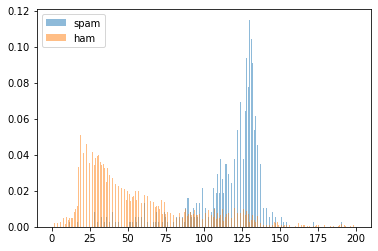

In [181]:
bins=np.linspace(0,200,400)
plt.hist(data[data['label']=='spam']['body_len'],bins,alpha=0.5,density=True,label='spam')
plt.hist(data[data['label']=='ham']['body_len'],bins,alpha=0.5,density=True,label='ham')
plt.legend(loc='upper left')
plt.show()

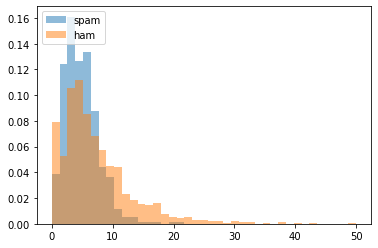

In [182]:
bins=np.linspace(0,50,40)
plt.hist(data[data['label']=='spam']['punct%'],bins,alpha=0.5,density=True,label='spam')
plt.hist(data[data['label']=='ham']['punct%'],bins,alpha=0.5,density=True,label='ham')
plt.legend(loc='upper left')
plt.show()

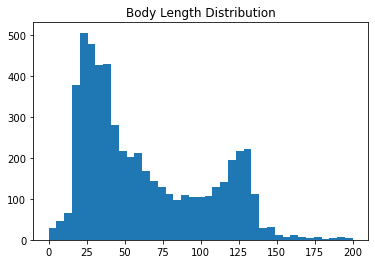

In [183]:
#Plot neww features

bins=np.linspace(0,200,40)
plt.hist(data['body_len'],bins)
plt.title("Body Length Distribution")
plt.show()

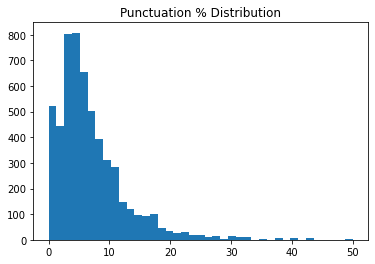

In [184]:
bins=np.linspace(0,50,40)
plt.hist(data['punct%'],bins)
plt.title("Punctuation % Distribution")
plt.show()

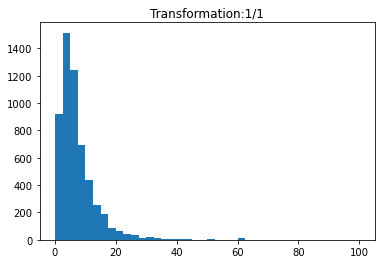

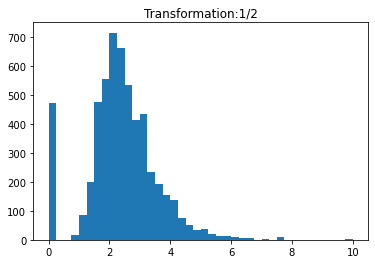

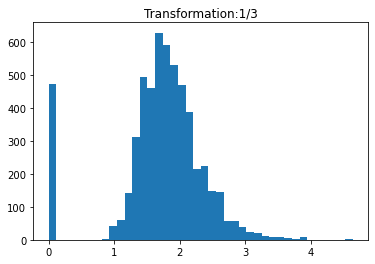

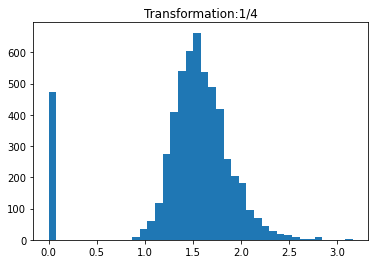

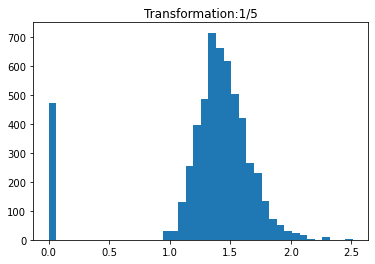

In [185]:
# Box-cox transformation
for i in [1,2,3,4,5]:
    plt.hist(data['punct%']**(1/i),bins=40)
    plt.title("Transformation:1/{}".format(str(i)))
    plt.show()

### Machine Learning

In [186]:
X_features=pd.concat([data['body_len'],data['punct%'],pd.DataFrame(X_tfidf.toarray())],axis=1)
X_features.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,8097,8098,8099,8100,8101,8102,8103,8104,8105,8106
0,160,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,62,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,28,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Explore Random Forest Classifier atrributes and hyperparmeters

Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset." Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.

The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.

In [187]:
from sklearn.ensemble import RandomForestClassifier

In [188]:
print(dir(RandomForestClassifier))
print(RandomForestClassifier)

['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_feature_names', '_check_n_features', '_compute_oob_predictions', '_estimator_type', '_get_oob_predictions', '_get_param_names', '_get_tags', '_make_estimator', '_more_tags', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_required_parameters', '_set_oob_score_and_attributes', '_validate_X_predict', '_validate_data', '_validate_estimator', '_validate_y_class_weight', 'apply', 'decision_path', 'feature_importances_', 'fit', 'get_params', 'n_features_', 'predict', 'predict_log_proba', 'predict_proba', 'score',

### Cross-Validation

In [189]:
from sklearn.model_selection import KFold, cross_val_score

In [190]:
rf=RandomForestClassifier(n_jobs=-1)
k_fold=KFold(n_splits=5)
cross_val_score(rf,X_features,data['label'],cv=k_fold,scoring='accuracy',n_jobs=-1)

array([0.97666068, 0.98025135, 0.97666068, 0.96585804, 0.97304582])

### Holdout set

In [191]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [192]:
X_train,X_test,y_train,y_test=train_test_split(X_features,data['label'],test_size=0.2)

In [193]:
rf_model=rf.fit(X_train,y_train)

C:\Users\Prath\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [194]:
sorted(zip(rf_model.feature_importances_,X_train.columns),reverse=True)[0:10]

[(0.05606671340697894, 'body_len'),
 (0.030223725821597183, 1804),
 (0.026919148969250697, 3135),
 (0.02583774353687393, 4799),
 (0.022073638154150872, 7353),
 (0.021441291651322216, 2032),
 (0.017347989962916692, 6288),
 (0.016622339747188217, 5727),
 (0.012853039143716478, 6749),
 (0.012125810925336758, 7221)]

In [58]:
y_pred=rf_model.predict(X_test)
precision,recall,fscore,support = score(y_test,y_pred,pos_label='spam',average='binary')

C:\Users\Prath\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [59]:
print('Precision:{}/ Recall:{}/ Accuracy:{}'.format(round(precision,3),
                                                   round(recall,3),
                                                   (y_pred==y_test).sum()/len(y_pred)))

Precision:0.993/ Recall:0.842/ Accuracy:0.9757630161579892


### RF with gridsearch

**Grid Search**: GridSearchCV is the process of performing hyperparameter tuning in order to determine the optimal values for a given model. As mentioned above, the performance of a model significantly depends on the value of hyperparameters. Note that there is no way to know in advance the best values for hyperparameters so ideally, we need to try all possible values to know the optimal values. Doing this manually could take a considerable amount of time and resources and thus we use GridSearchCV to automate the tuning of hyperparameters.

In [60]:
def train_RF(n_est, depth):
    rf=RandomForestClassifier(n_estimators=n_est,max_depth=depth,n_jobs=-1)
    rf_model=rf.fit(X_train,y_train)
    y_pred=rf_model.predict(X_test)
    precision,recall, fscore, support=score(y_test,y_pred,pos_label='spam',average='binary')
    print('Est:{} / Depth:{} ---- Precision:{} / Recall:{}/ Accuracy:{}'.format(n_est,depth, round(precision,3),round(recall,3),
                                                                               round((y_pred==y_test).sum()/len(y_pred),3)))

In [61]:
for n_est in [10,50,100]:
    for depth in [10,20,30, None]:
        train_RF(n_est,depth)

C:\Users\Prath\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Prath\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Prath\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Est:10 / Depth:10 ---- Precision:1.0 / Recall:0.248/ Accuracy:0.889


C:\Users\Prath\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Prath\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Est:10 / Depth:20 ---- Precision:1.0 / Recall:0.564/ Accuracy:0.935


C:\Users\Prath\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Prath\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Est:10 / Depth:30 ---- Precision:1.0 / Recall:0.691/ Accuracy:0.954


C:\Users\Prath\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Prath\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Est:10 / Depth:None ---- Precision:0.993 / Recall:0.836/ Accuracy:0.975


C:\Users\Prath\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Prath\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Est:50 / Depth:10 ---- Precision:1.0 / Recall:0.291/ Accuracy:0.895


C:\Users\Prath\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Prath\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Est:50 / Depth:20 ---- Precision:1.0 / Recall:0.594/ Accuracy:0.94


C:\Users\Prath\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Prath\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Est:50 / Depth:30 ---- Precision:1.0 / Recall:0.703/ Accuracy:0.956


C:\Users\Prath\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Prath\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Est:50 / Depth:None ---- Precision:1.0 / Recall:0.806/ Accuracy:0.971


C:\Users\Prath\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Prath\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Est:100 / Depth:10 ---- Precision:1.0 / Recall:0.194/ Accuracy:0.881


C:\Users\Prath\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Prath\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Est:100 / Depth:20 ---- Precision:1.0 / Recall:0.57/ Accuracy:0.936


C:\Users\Prath\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Prath\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Est:100 / Depth:30 ---- Precision:1.0 / Recall:0.758/ Accuracy:0.964
Est:100 / Depth:None ---- Precision:0.993 / Recall:0.848/ Accuracy:0.977


C:\Users\Prath\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


### Evaluate RF with GridSearchCV

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
param={'n_estimators':[10,150,300],          #primary grid
      'max_depth':[30,60,90,None]}
gs=GridSearchCV(rf,param,cv=5,n_jobs=-1)
gs_fit=gs.fit(X_tfidf_feat,data['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score',ascending=False)[0:5]

C:\Users\Prath\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,35.380381,14.163731,4.575382,0.839054,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.981149,0.976661,0.973070,0.968553,0.973944,0.974675,0.004158,1
6,20.771589,3.155230,2.841564,0.878410,90,10,"{'max_depth': 90, 'n_estimators': 10}",0.976661,0.973968,0.974865,0.967655,0.975741,0.973778,0.003190,2
8,47.305009,5.682272,3.882459,1.930522,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.977558,0.978456,0.973070,0.968553,0.971249,0.973777,0.003751,3
11,46.540797,5.000705,3.992822,3.054767,None,300,"{'max_depth': None, 'n_estimators': 300}",0.978456,0.974865,0.973070,0.967655,0.969452,0.972700,0.003846,4
10,37.457490,14.485168,4.372818,3.225404,None,150,"{'max_depth': None, 'n_estimators': 150}",0.976661,0.975763,0.973070,0.964960,0.971249,0.972340,0.004161,5


In [70]:
param={'n_estimators':[10,150,300],          #primary grid
      'max_depth':[30,60,90,None]}
gs=GridSearchCV(rf,param,cv=5,n_jobs=-1)
gs_fit=gs.fit(X_counts_feat,data['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score',ascending=False)[0:5]

C:\Users\Prath\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,41.571881,11.852880,2.615707,2.260348,None,300,"{'max_depth': None, 'n_estimators': 300}",0.977558,0.975763,0.974865,0.968553,0.969452,0.973238,0.003577,1
7,34.185797,19.142140,6.373317,3.319033,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.979354,0.973070,0.973070,0.967655,0.971249,0.972880,0.003793,2
10,49.218678,9.749994,2.980031,1.126603,None,150,"{'max_depth': None, 'n_estimators': 150}",0.976661,0.975763,0.973968,0.965858,0.971249,0.972700,0.003888,3
8,45.967976,8.960758,5.232605,4.213483,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.979354,0.974865,0.973968,0.965858,0.969452,0.972699,0.004646,4
6,22.872814,7.645196,4.149516,0.887098,90,10,"{'max_depth': 90, 'n_estimators': 10}",0.971275,0.977558,0.971275,0.964061,0.972147,0.971263,0.004296,5


In [210]:
X_train, X_test, y_train, y_test = train_test_split(data[['body_list','body_len', 'punct%']], data['label'], test_size=0.2)

In [211]:
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
tfidf_vect_fit = tfidf_vect.fit(X_train['body_list'])

tfidf_train = tfidf_vect_fit.transform(X_train['body_list'])
tfidf_test = tfidf_vect_fit.transform(X_test['body_list'])

X_train_vect = pd.concat([X_train[['body_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['body_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,7160,7161,7162,7163,7164,7165,7166,7167,7168,7169
0,129,6.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,38,15.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,44,2.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,25,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,26,3.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [212]:
import time
rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)

start = time.time()
rf_model = rf.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = rf_model.predict(X_test_vect)
end = time.time()
pred_time = (end - start)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

C:\Users\Prath\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Fit time: 3.031 / Predict time: 0.149 ---- Precision: 1.0 / Recall: 0.833 / Accuracy: 0.977


C:\Users\Prath\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


### Conclusion

The developed spam detection model, utilizing NLP techniques and the Random Forest algorithm, has proven highly effective in differentiating between spam and legitimate messages. Through meticulous data preprocessing, including tokenization and feature engineering such as N-grams or TF-IDF, the model achieves a robust representation of text data. Leveraging the ensemble learning capabilities of Random Forest, the model successfully handles high-dimensional text features, excelling in capturing intricate relationships within the data. Rigorous model evaluation, encompassing metrics like accuracy, precision, recall, and F1-score, ensures its reliability.